In [1]:
import numpy as np
import pandas as pd
pd.set_option('max_columns',120)
pd.set_option('max_colwidth',5000)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize']=(12,8) #change the size of fig drawn (width=12,ht=8)


In [2]:
#skipping row1 which contain erraneous data
#dtype is mentioned here ; low_memory is set to avoid conflict while reading huge file by pandas which guess dtype for each column
loans_2007  = pd.read_csv('lending_club_loans.csv', skiprows = 1, low_memory = False)

In [3]:
half_count = len(loans_2007)/2
loans_2007 = loans_2007.dropna(thresh=half_count,axis=1) #drop any col missing 50% of data values
loans_2007 = loans_2007.drop(['url','desc'],axis=1)      #drop this two columns

In [4]:
loans_2007.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,3.0,0.0,13648.0,83.7%,9.0,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-2015,171.62,Sep-2016,744.0,740.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,3.0,0.0,1687.0,9.4%,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,Sep-2016,499.0,0.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,735.0,739.0,2.0,2.0,0.0,2956.0,98.5%,10.0,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-2014,649.91,Sep-2016,719.0,715.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,other,personel,917xx,CA,20.00,0.0,Feb-1996,690.0,694.0,1.0,10.0,0.0,5598.0,21%,37.0,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-2015,357.48,Apr-2016,604.0,600.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,other,Personal,972xx,OR,17.94,0.0,Jan-1996,695.0,699.0,0.0,15.0,0.0,27783.0,53.9%,38.0,f,270.78,270.78,3784.490000,3784.49,2729.22,1055.27,0.00,0.00,0.00,Sep-2016,67.79,Sep-2016,694.0,690.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [5]:
loans_2007.shape

(42538, 56)

In [6]:
data_dictionary = pd.read_csv("LCDataDictionary.csv")
print(data_dictionary.shape)
print(data_dictionary.columns.tolist())

(117, 2)
['LoanStatNew', 'Description']


In [7]:
data_dictionary.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.


In [8]:
data_dictionary = data_dictionary.rename(columns={'LoanStatNew': 'name',
                                                 'Description': 'description'})

In [9]:
data_dictionary.head()

,name,description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.


In [10]:
loans_2007_dtypes = pd.DataFrame(loans_2007.dtypes,columns=['dtypes'])

In [11]:
loans_2007_dtypes = loans_2007_dtypes.reset_index()
loans_2007_dtypes['name'] = loans_2007_dtypes['index']
loans_2007_dtypes = loans_2007_dtypes[['name','dtypes']]

loans_2007_dtypes['first value'] = loans_2007.loc[0].values
preview = loans_2007_dtypes.merge(data_dictionary, on='name',how='left')


In [12]:
preview.head()

,name,dtypes,first value,description
0,id,object,1077501,A unique LC assigned ID for the loan listing.
1,member_id,float64,1.2966e+06,A unique LC assigned Id for the borrower member.
2,loan_amnt,float64,5000,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
3,funded_amnt,float64,5000,The total amount committed to that loan at that point in time.
4,funded_amnt_inv,float64,4975,The total amount committed by investors for that loan at that point in time.


In [13]:
preview.shape

(56, 4)

In [14]:
preview[:19]

,name,dtypes,first value,description
0,id,object,1077501,A unique LC assigned ID for the loan listing.
1,member_id,float64,1.2966e+06,A unique LC assigned Id for the borrower member.
2,loan_amnt,float64,5000,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
3,funded_amnt,float64,5000,The total amount committed to that loan at that point in time.
4,funded_amnt_inv,float64,4975,The total amount committed by investors for that loan at that point in time.
5,term,object,36 months,The number of payments on the loan. Values are in months and can be either 36 or 60.
6,int_rate,object,10.65%,Interest Rate on the loan
7,installment,float64,162.87,The monthly payment owed by the borrower if the loan originates.
8,grade,object,B,LC assigned loan grade
9,sub_grade,object,B2,LC assigned loan subgrade


In [15]:
drop_list = ['id','member_id','funded_amnt','funded_amnt_inv',
             'int_rate','sub_grade','emp_title','issue_d']
loans_2007 = loans_2007.drop(drop_list,axis=1)


In [16]:
preview[19:38]

,name,dtypes,first value,description
19,title,object,Computer,The loan title provided by the borrower
20,zip_code,object,860xx,The first 3 numbers of the zip code provided by the borrower in the loan application.
21,addr_state,object,AZ,The state provided by the borrower in the loan application
22,dti,float64,27.65,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
23,delinq_2yrs,float64,0,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
24,earliest_cr_line,object,Jan-1985,The month the borrower's earliest reported credit line was opened
25,fico_range_low,float64,735,The lower boundary range the borrower’s FICO at loan origination belongs to.
26,fico_range_high,float64,739,The upper boundary range the borrower’s FICO at loan origination belongs to.
27,inq_last_6mths,float64,1,The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
28,open_acc,float64,3,The number of open credit lines in the borrower's credit file.


In [17]:
drop_cols = [ 'zip_code','out_prncp','out_prncp_inv',   #leaks data from the future
             'total_pymnt','total_pymnt_inv']
loans_2007 = loans_2007.drop(drop_cols, axis=1)


In [18]:
preview[38:]

,name,dtypes,first value,description
38,total_rec_prncp,float64,5000,Principal received to date
39,total_rec_int,float64,863.16,Interest received to date
40,total_rec_late_fee,float64,0,Late fees received to date
41,recoveries,float64,0,post charge off gross recovery
42,collection_recovery_fee,float64,0,post charge off collection fee
43,last_pymnt_d,object,Jan-2015,Last month payment was received
44,last_pymnt_amnt,float64,171.62,Last total payment amount received
45,last_credit_pull_d,object,Sep-2016,The most recent month LC pulled credit for this loan
46,last_fico_range_high,float64,744,The upper boundary range the borrower’s last FICO pulled belongs to.
47,last_fico_range_low,float64,740,The lower boundary range the borrower’s last FICO pulled belongs to.


In [19]:
drop_cols = ['total_rec_prncp','total_rec_int', 'total_rec_late_fee',
             'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
             'last_pymnt_amnt']

loans_2007 = loans_2007.drop(drop_cols, axis=1)


In [20]:
print(loans_2007['fico_range_low'].unique())
print(loans_2007['fico_range_high'].unique())


[ 735.  740.  690.  695.  730.  660.  675.  725.  710.  705.  720.  665.
  670.  760.  685.  755.  680.  700.  790.  750.  715.  765.  745.  770.
  780.  775.  795.  810.  800.  815.  785.  805.  825.  820.  630.  625.
   nan  650.  655.  645.  640.  635.  610.  620.  615.]
[ 739.  744.  694.  699.  734.  664.  679.  729.  714.  709.  724.  669.
  674.  764.  689.  759.  684.  704.  794.  754.  719.  769.  749.  774.
  784.  779.  799.  814.  804.  819.  789.  809.  829.  824.  634.  629.
   nan  654.  659.  649.  644.  639.  614.  624.  619.]


42538
42535


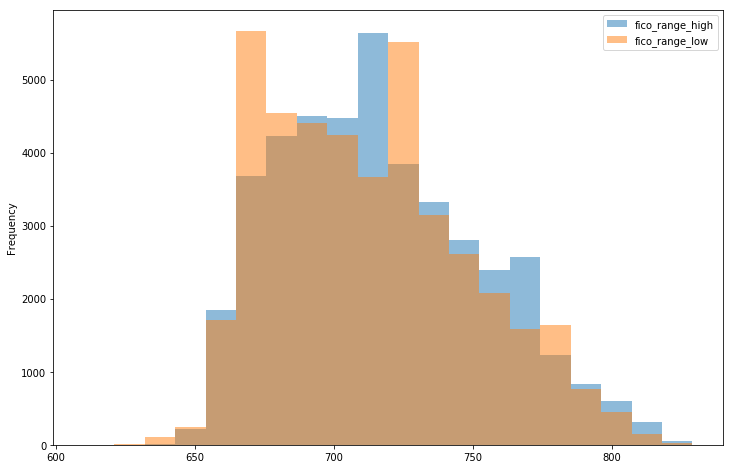

In [21]:
fico_columns = ['fico_range_high','fico_range_low']

print(loans_2007.shape[0])
loans_2007.dropna(subset = fico_columns,inplace=True)
print(loans_2007.shape[0])

loans_2007[fico_columns].plot.hist(alpha=0.5,bins=20)

In [22]:
loans_2007['fico_average'] = (loans_2007['fico_range_high'] + loans_2007['fico_range_low']) / 2

In [23]:
cols = ['fico_range_low','fico_range_high','fico_average']
loans_2007[cols].head()


,fico_range_low,fico_range_high,fico_average
0,735.0,739.0,737.0
1,740.0,744.0,742.0
2,735.0,739.0,737.0
3,690.0,694.0,692.0
4,695.0,699.0,697.0


In [24]:
drop_cols = ['fico_range_low','fico_range_high','last_fico_range_low',
             'last_fico_range_high']
loans_2007 = loans_2007.drop(drop_cols, axis=1)
loans_2007.shape


(42535, 33)

In [25]:
loans_2007.head()

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,fico_average
0,5000.0,36 months,162.87,B,10+ years,RENT,24000.0,Verified,Fully Paid,n,credit_card,Computer,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7%,9.0,f,Sep-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,737.0
1,2500.0,60 months,59.83,C,< 1 year,RENT,30000.0,Source Verified,Charged Off,n,car,bike,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4%,4.0,f,Sep-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,742.0
2,2400.0,36 months,84.33,C,10+ years,RENT,12252.0,Not Verified,Fully Paid,n,small_business,real estate business,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5%,10.0,f,Sep-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,737.0
3,10000.0,36 months,339.31,C,10+ years,RENT,49200.0,Source Verified,Fully Paid,n,other,personel,CA,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21%,37.0,f,Apr-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,692.0
4,3000.0,60 months,67.79,B,1 year,RENT,80000.0,Source Verified,Current,n,other,Personal,OR,17.94,0.0,Jan-1996,0.0,15.0,0.0,27783.0,53.9%,38.0,f,Sep-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,697.0


In [26]:
loans_2007["loan_status"].value_counts()


Fully Paid                                             33586
Charged Off                                             5653
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Current                                                  513
In Grace Period                                           16
Late (31-120 days)                                        12
Late (16-30 days)                                          5
Default                                                    1
Name: loan_status, dtype: int64

In [27]:
#main goal is predict who will pay off a loan and who will default
preview[preview.name == 'loan_status']

,name,dtypes,first value,description
16,loan_status,object,Fully Paid,Current status of the loan


In [28]:
meaning = [
    "Loan has been fully paid off.",
    "Loan for which there is no longer a reasonable expectation of further payments.",
    "While the loan was paid off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace.",
    "While the loan was charged off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace.",
    "Loan is up to date on current payments.",
    "The loan is past due but still in the grace period of 15 days.",
    "Loan hasn't been paid in 31 to 120 days (late on the current payment).",
    "Loan hasn't been paid in 16 to 30 days (late on the current payment).",
    "Loan is defaulted on and no payment has been made for more than 121 days."]

status, count = loans_2007["loan_status"].value_counts().index, loans_2007["loan_status"].value_counts().values

loan_statuses_explanation = pd.DataFrame({'Loan Status': status,'Count': count,'Meaning': meaning})[['Loan Status','Count','Meaning']]
loan_statuses_explanation


,Loan Status,Count,Meaning
0,Fully Paid,33586,Loan has been fully paid off.
1,Charged Off,5653,Loan for which there is no longer a reasonable expectation of further payments.
2,Does not meet the credit policy. Status:Fully Paid,1988,"While the loan was paid off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace."
3,Does not meet the credit policy. Status:Charged Off,761,"While the loan was charged off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace."
4,Current,513,Loan is up to date on current payments.
5,In Grace Period,16,The loan is past due but still in the grace period of 15 days.
6,Late (31-120 days),12,Loan hasn't been paid in 31 to 120 days (late on the current payment).
7,Late (16-30 days),5,Loan hasn't been paid in 16 to 30 days (late on the current payment).
8,Default,1,Loan is defaulted on and no payment has been made for more than 121 days.


In [29]:
loans_2007 = loans_2007[(loans_2007["loan_status"]=="Fully paid")|(loans_2007["loan_status"]=="Charged Off")]

mapping_dictionary = {"loan_status":{"Fully Paid":1,"Charged Off":0}}
loans_2007 = loans_2007.replace(mapping_dictionary)

In [30]:
loans_2007.head(20)

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,fico_average
1,2500.0,60 months,59.83,C,< 1 year,RENT,30000.0,Source Verified,0,n,car,bike,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4%,4.0,f,Sep-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,742.0
8,5600.0,60 months,152.39,F,4 years,OWN,40000.0,Source Verified,0,n,small_business,Expand Business & Buy Debt Portfolio,CA,5.55,0.0,Apr-2004,2.0,11.0,0.0,5210.0,32.6%,13.0,f,Sep-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,677.0
9,5375.0,60 months,121.45,B,< 1 year,RENT,15000.0,Verified,0,n,other,Building my credit history.,TX,18.08,0.0,Sep-2004,0.0,2.0,0.0,9279.0,36.5%,3.0,f,Sep-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,727.0
12,9000.0,36 months,305.38,C,< 1 year,RENT,30000.0,Source Verified,0,n,debt_consolidation,freedom,VA,10.08,0.0,Apr-2004,1.0,4.0,0.0,10452.0,91.7%,9.0,f,Sep-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,712.0
14,10000.0,36 months,325.74,B,3 years,RENT,100000.0,Source Verified,0,n,other,Other Loan,CA,7.06,0.0,May-1991,2.0,14.0,0.0,11997.0,55.5%,29.0,f,Sep-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,722.0
21,21000.0,36 months,701.73,B,10+ years,RENT,105000.0,Verified,0,n,debt_consolidation,Debt Cleanup,FL,13.22,0.0,Feb-1983,0.0,7.0,0.0,32135.0,90.3%,38.0,f,Sep-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,707.0
24,6000.0,36 months,198.46,B,1 year,RENT,76000.0,Not Verified,0,n,major_purchase,cash,CA,2.40,0.0,Jun-2001,1.0,7.0,0.0,5963.0,29.7%,7.0,f,Sep-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,692.0
26,15000.0,36 months,514.64,C,9 years,RENT,60000.0,Not Verified,0,n,debt_consolidation,consolidation,NY,15.22,0.0,Oct-2003,1.0,7.0,0.0,5872.0,57.6%,11.0,f,Sep-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,697.0
27,5000.0,60 months,123.65,D,2 years,RENT,50004.0,Not Verified,0,n,other,Other,PA,13.97,3.0,Oct-2003,0.0,14.0,0.0,4345.0,59.5%,22.0,f,Sep-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,677.0
46,5000.0,36 months,158.77,A,10+ years,MORTGAGE,100000.0,Source Verified,0,n,debt_consolidation,Debt Consolidation for a better life,OH,16.33,0.0,Jun-1995,0.0,17.0,0.0,74351.0,62.1%,35.0,f,Sep-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,707.0


In [31]:
loans_2007 = loans_2007.loc[:,loans_2007.apply(pd.Series.nunique) != 1]
#returns no of unique elements

In [32]:
loans_2007.head(20)

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,pub_rec_bankruptcies,fico_average
1,2500.0,60 months,59.83,C,< 1 year,RENT,30000.0,Source Verified,car,bike,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4%,4.0,Sep-2016,0.0,742.0
8,5600.0,60 months,152.39,F,4 years,OWN,40000.0,Source Verified,small_business,Expand Business & Buy Debt Portfolio,CA,5.55,0.0,Apr-2004,2.0,11.0,0.0,5210.0,32.6%,13.0,Sep-2016,0.0,677.0
9,5375.0,60 months,121.45,B,< 1 year,RENT,15000.0,Verified,other,Building my credit history.,TX,18.08,0.0,Sep-2004,0.0,2.0,0.0,9279.0,36.5%,3.0,Sep-2016,0.0,727.0
12,9000.0,36 months,305.38,C,< 1 year,RENT,30000.0,Source Verified,debt_consolidation,freedom,VA,10.08,0.0,Apr-2004,1.0,4.0,0.0,10452.0,91.7%,9.0,Sep-2016,0.0,712.0
14,10000.0,36 months,325.74,B,3 years,RENT,100000.0,Source Verified,other,Other Loan,CA,7.06,0.0,May-1991,2.0,14.0,0.0,11997.0,55.5%,29.0,Sep-2016,0.0,722.0
21,21000.0,36 months,701.73,B,10+ years,RENT,105000.0,Verified,debt_consolidation,Debt Cleanup,FL,13.22,0.0,Feb-1983,0.0,7.0,0.0,32135.0,90.3%,38.0,Sep-2016,0.0,707.0
24,6000.0,36 months,198.46,B,1 year,RENT,76000.0,Not Verified,major_purchase,cash,CA,2.40,0.0,Jun-2001,1.0,7.0,0.0,5963.0,29.7%,7.0,Sep-2016,0.0,692.0
26,15000.0,36 months,514.64,C,9 years,RENT,60000.0,Not Verified,debt_consolidation,consolidation,NY,15.22,0.0,Oct-2003,1.0,7.0,0.0,5872.0,57.6%,11.0,Sep-2016,0.0,697.0
27,5000.0,60 months,123.65,D,2 years,RENT,50004.0,Not Verified,other,Other,PA,13.97,3.0,Oct-2003,0.0,14.0,0.0,4345.0,59.5%,22.0,Sep-2016,0.0,677.0
46,5000.0,36 months,158.77,A,10+ years,MORTGAGE,100000.0,Source Verified,debt_consolidation,Debt Consolidation for a better life,OH,16.33,0.0,Jun-1995,0.0,17.0,0.0,74351.0,62.1%,35.0,Sep-2016,0.0,707.0


In [33]:
loans_2007.shape

(5653, 23)

In [34]:
for col in loans_2007.columns:
    if(len(loans_2007[col].unique())<4):
        print(loans_2007[col].value_counts())
        print()

 36 months    3227
 60 months    2426
Name: term, dtype: int64

Not Verified       2144
Verified           2065
Source Verified    1444
Name: verification_status, dtype: int64

0.0    5183
1.0     460
2.0      10
Name: pub_rec, dtype: int64

